#### Name: Sourabh maniyar
#### Roll No: 31251

## Assignment-2 : Data Wrangling II
#### Create an “Academic performance” dataset of students and perform the following operations using Python.
#### 1.	Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them.
#### 2.	Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them.
#### 3.	Apply data transformations on at least one of the variables. The purpose of this transformation should be one of the following reasons: to change the scale for better understanding of the variable, to convert a non-linear relation into a linear one, or to decrease the skewness and convert the distribution into a normal distribution.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import pylab
import seaborn as sns

In [2]:
df = pd.read_csv('StudentsPerformance.csv') #Loading the dataset

In [3]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,NaN
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99.0,NaN
996,male,group C,high school,free/reduced,none,62.0,55.0,55.0
997,female,group C,high school,free/reduced,completed,59.0,NaN,65.0
998,female,group D,some college,standard,completed,68.0,78.0,77.0


In [4]:
df.head() #Print first 5 rows

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,NaN
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0


In [5]:
df.tail() #Print last 5 rows

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88.0,99.0,NaN
996,male,group C,high school,free/reduced,none,62.0,55.0,55.0
997,female,group C,high school,free/reduced,completed,59.0,NaN,65.0
998,female,group D,some college,standard,completed,68.0,78.0,77.0
999,female,group D,some college,free/reduced,none,77.0,86.0,86.0


In [6]:
df.describe() #Show statistical information

,math score,reading score,writing score
count,982.000000,988.000000,983.000000
mean,67.569246,69.149798,68.025432
std,27.600928,14.600240,15.238844
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,57.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.000000,79.000000
max,605.000000,100.000000,100.000000


### Dealing with Missing Values

In [7]:
df.isnull().sum()

gender                          0
race/ethnicity                  0
parental level of education     0
lunch                           0
test preparation course         0
math score                     18
reading score                  12
writing score                  17
dtype: int64

In [8]:
mean_value=df['math score'].mean()
df['math score'].fillna(value=mean_value, inplace=True)

In [9]:
mean_value=df['reading score'].mean()
df['reading score'].fillna(value=mean_value, inplace=True)

In [10]:
mean_value=df['writing score'].mean()
df['writing score'].fillna(value=mean_value, inplace=True)

In [11]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### Data Formatting

In [12]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                     float64
reading score                  float64
writing score                  float64
dtype: object

In [13]:
df['math score'] = df['math score'].astype(int)
df['reading score'] = df['reading score'].astype(int)
df['writing score'] = df['writing score'].astype(int)

In [14]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int32
reading score                   int32
writing score                   int32
dtype: object

### Finding and Removing Outliers

In [15]:
df['math score'].max()

605

#### 1. Inter Quartile Range Method

In [16]:
Q1 = df['math score'].quantile(0.25) #First quartile
Q3 = df['math score'].quantile(0.75) #Third quartile
Q1, Q3

(57.0, 77.0)

In [17]:
IQR = Q3-Q1 #Inter quartile range
IQR

20.0

In [18]:
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
lower_limit, upper_limit

(27.0, 107.0)

In [19]:
df[(df['math score']<lower_limit) | (df['math score']>upper_limit)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
17,female,group B,some high school,free/reduced,none,18,32,28
59,female,group C,some high school,free/reduced,none,0,17,10
88,female,group A,some college,standard,none,200,70,67
145,female,group C,some college,free/reduced,none,22,39,33
166,male,group C,high school,free/reduced,completed,513,51,51
171,male,group E,some high school,standard,none,194,88,78
338,female,group B,some high school,free/reduced,none,24,38,27
466,female,group D,associate's degree,free/reduced,none,26,31,38
653,female,group A,associate's degree,standard,completed,605,70,74
787,female,group B,some college,standard,none,19,38,32


In [20]:
df_without_outliers=df[(df['math score']>lower_limit) & (df['math score']<upper_limit)]
df_without_outliers

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,68
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,68
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,69,65
998,female,group D,some college,standard,completed,68,78,77


#### 2. Values in range 0 to 100

In [21]:
lower_limit = 0
upper_limit = 100
df[(df['math score']<lower_limit) | (df['math score']>upper_limit)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
88,female,group A,some college,standard,none,200,70,67
110,female,group D,associate's degree,free/reduced,completed,107,89,98
121,male,group B,associate's degree,standard,completed,101,89,92
160,male,group B,associate's degree,free/reduced,completed,102,78,74
166,male,group C,high school,free/reduced,completed,513,51,51
171,male,group E,some high school,standard,none,194,88,78
573,female,group C,high school,free/reduced,completed,102,66,64
653,female,group A,associate's degree,standard,completed,605,70,74


In [22]:
df_without_outliers1 = df[(df['math score']>lower_limit) & (df['math score']<upper_limit)]
df_without_outliers1

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,68
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,68
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,69,65
998,female,group D,some college,standard,completed,68,78,77


<AxesSubplot:xlabel='math score'>

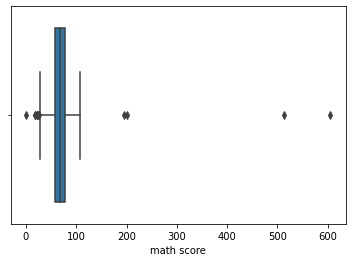

In [23]:
sns.boxplot(x=df['math score'])

<AxesSubplot:xlabel='math score'>

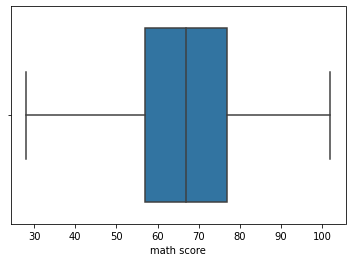

In [24]:
sns.boxplot(x=df_without_outliers['math score'])

<AxesSubplot:xlabel='math score'>

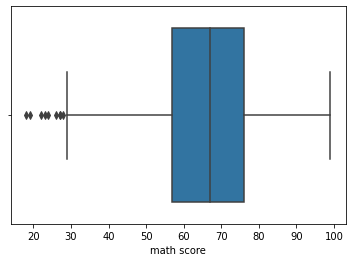

In [25]:
sns.boxplot(x=df_without_outliers1['math score'])

In [26]:
df.skew() #returns skewness

C:\Users\kotka\AppData\Local\Temp/ipykernel_15024/938849225.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew() #returns skewness


math score       12.077775
reading score    -0.262018
writing score    -0.296788
dtype: float64

In [27]:
df_without_outliers.skew()

C:\Users\kotka\AppData\Local\Temp/ipykernel_15024/1790224631.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_without_outliers.skew()


math score      -0.031118
reading score   -0.194636
writing score   -0.219991
dtype: float64

<AxesSubplot:xlabel='math score', ylabel='Density'>

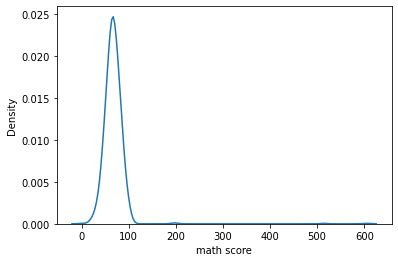

In [28]:
sns.kdeplot(df['math score'])

<AxesSubplot:xlabel='math score', ylabel='Density'>

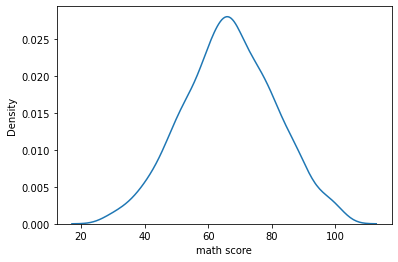

In [29]:
sns.kdeplot(df_without_outliers['math score'])

<AxesSubplot:xlabel='reading score', ylabel='Density'>

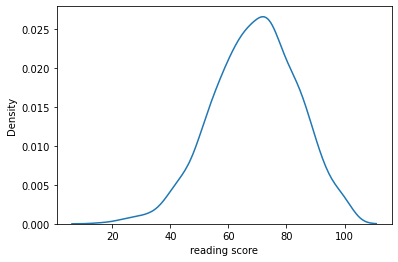

In [30]:
sns.kdeplot(df['reading score'])

<AxesSubplot:xlabel='writing score', ylabel='Density'>

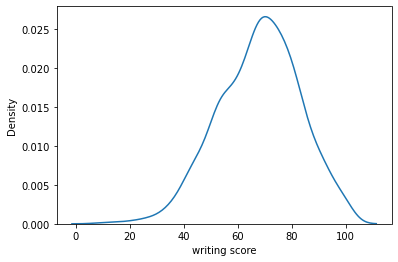

In [31]:
sns.kdeplot(df['writing score'])

### Data Transformations

In [32]:
df['math score'].mean()

67.559

In [33]:
def normality(data,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.kdeplot(data[feature])
    plt.subplot(1,2,2)
    stats.probplot(data[feature],plot=pylab)
    plt.show()

#### 1. Reciprocal Transformation

c:\users\kotka\appdata\local\programs\python\python39\lib\site-packages\numpy\lib\function_base.py:2474: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


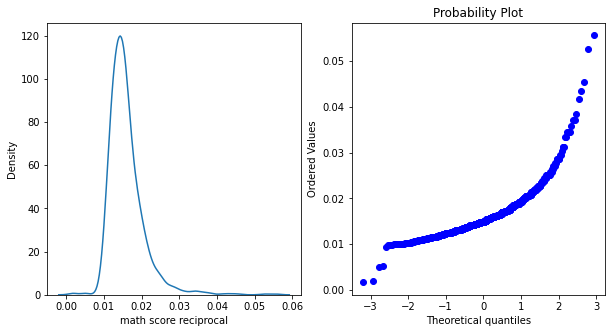

In [34]:
# Reciprocal Transformation
df['math score reciprocal']=1/df['math score']
normality(df,'math score reciprocal')

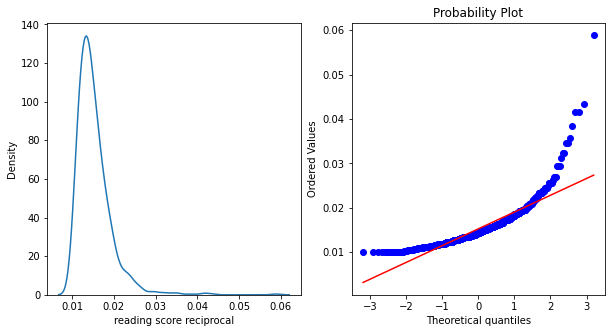

In [35]:
df['reading score reciprocal']=1/df['reading score']
normality(df,'reading score reciprocal')

In [36]:
df['reading score reciprocal'].skew()

2.98632627454535

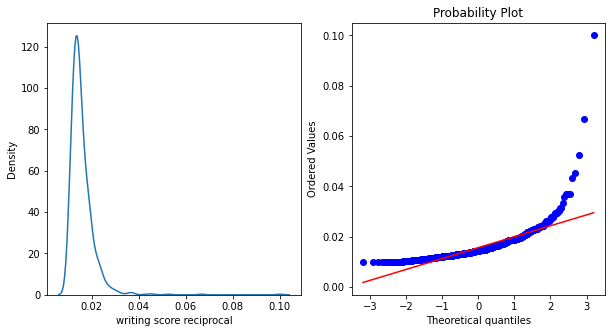

In [37]:
df['writing score reciprocal']=1/df['writing score']
normality(df,'writing score reciprocal')

In [38]:
df['writing score reciprocal'].skew()

5.976786915855157

#### 2. Square Root Transformation

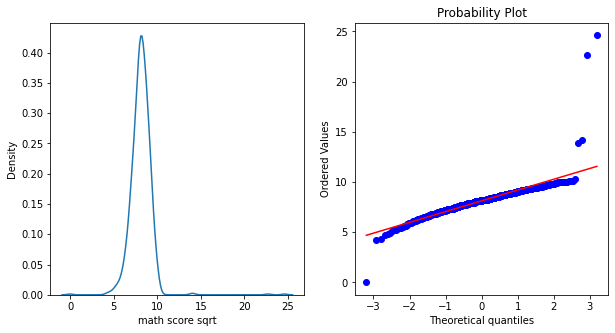

In [39]:
# Square Root Transformation
df['math score sqrt']=np.sqrt(df['math score'])
normality(df,'math score sqrt')

In [40]:
df['math score sqrt'].skew()

3.692380545285561

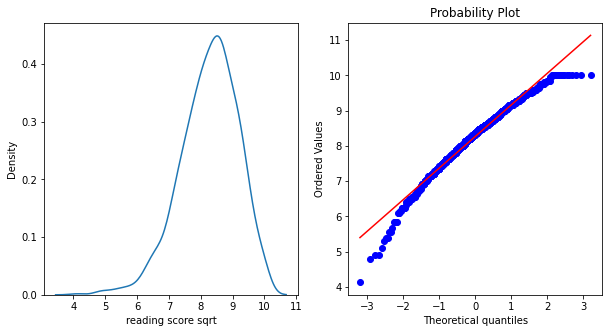

In [41]:
df['reading score sqrt']=np.sqrt(df['reading score'])
normality(df,'reading score sqrt')

In [42]:
df['reading score sqrt'].skew()

-0.6398756178682481

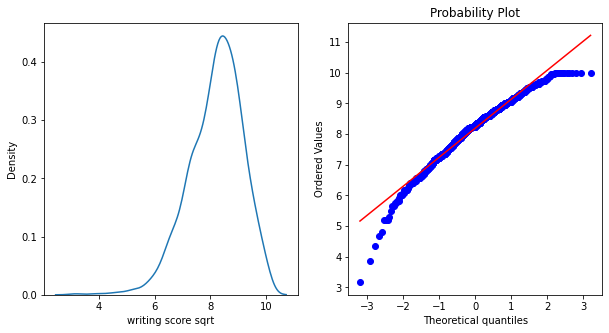

In [43]:
df['writing score sqrt']=np.sqrt(df['writing score'])
normality(df,'writing score sqrt')

In [44]:
df['writing score sqrt'].skew()

-0.738922791844053

#### 3. Logarithmic Transformation

c:\users\kotka\appdata\local\programs\python\python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\users\kotka\appdata\local\programs\python\python39\lib\site-packages\numpy\lib\function_base.py:2474: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


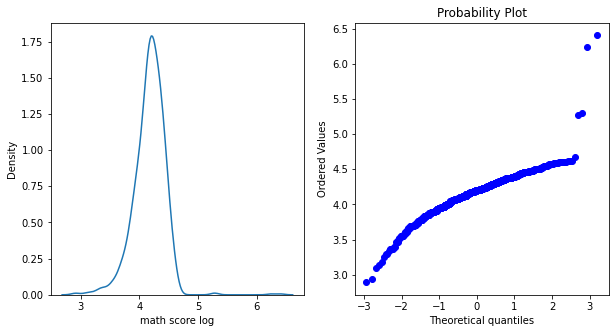

In [45]:
# Logarithmic Transformation
df['math score log']=np.log(df['math score'])
normality(df,'math score log')

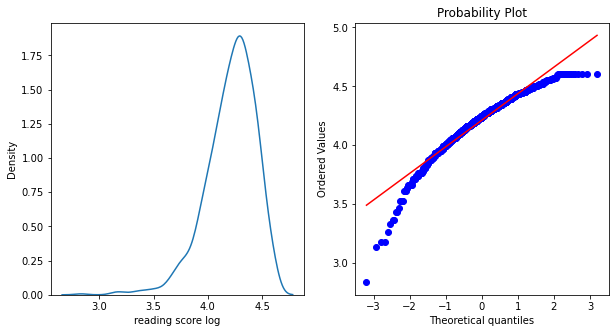

In [46]:
df['reading score log']=np.log(df['reading score'])
normality(df,'reading score log')

In [47]:
df['reading score log'].skew()

-1.1425959855465833

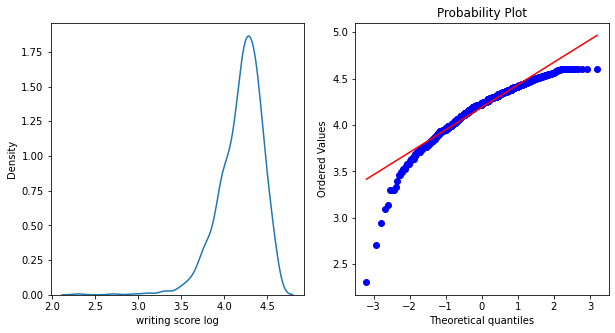

In [48]:
df['writing score log']=np.log(df['writing score'])
normality(df,'writing score log')

In [49]:
df['writing score log'].skew()

-1.4545902997722016